![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [3]:
# Re-run this cell 


# Read in the data

# Preview the data

# Start coding here...
# Add as many cells as you like...

In [10]:

# Import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understand data
schools = pd.read_csv("schools.csv")
schools.head()
schools.info()
schools.describe()



average_math  average_reading  average_writing  percent_tested
count    375.000000       375.000000       375.000000      355.000000
mean     432.944000       424.504000       418.458667       64.976338
std       71.952373        61.881069        64.548599       18.747634
min      317.000000       302.000000       284.000000       18.500000
25%      386.000000       386.000000       382.000000       50.950000
50%      415.000000       413.000000       403.000000       64.800000
75%      458.500000       445.000000       437.500000       79.600000
max      754.000000       697.000000       693.000000      100.000000

select schools_name from schools where average_math>0.8*800 order by average_math desc

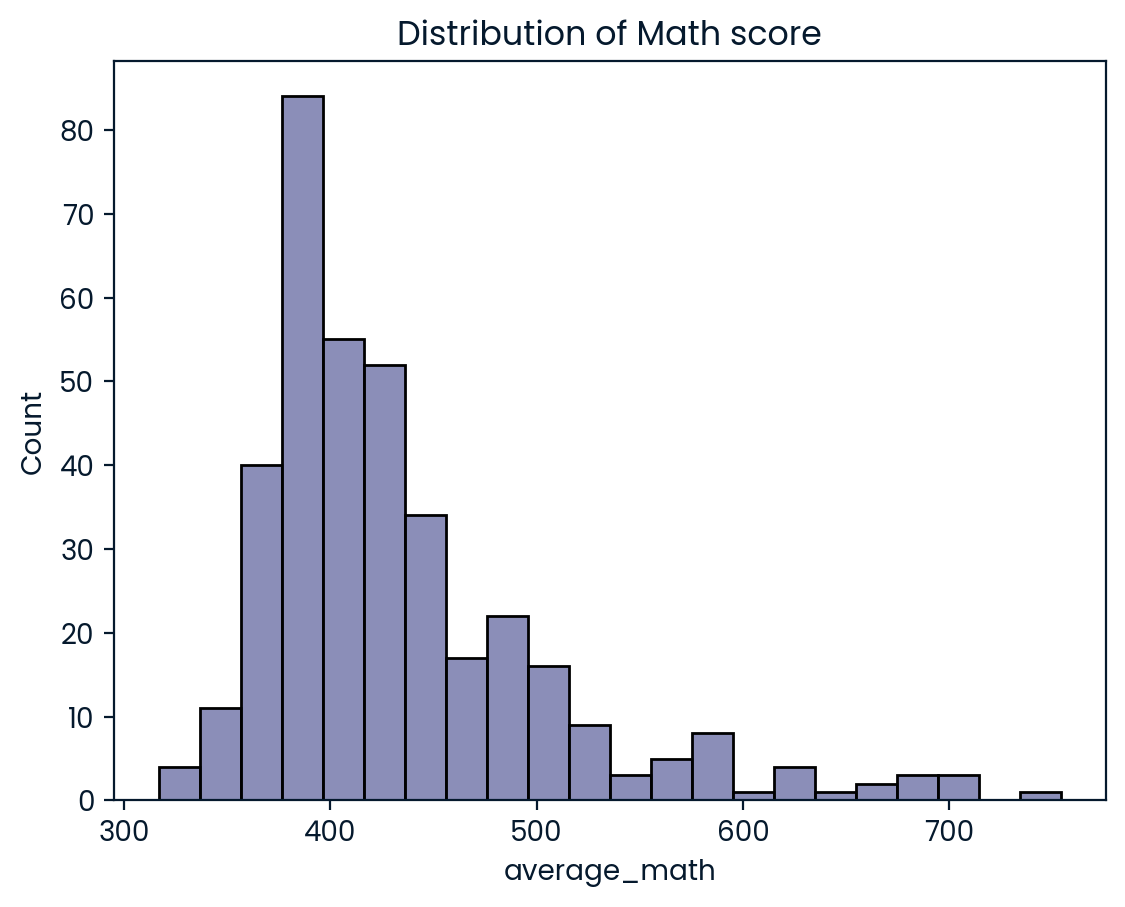

In [13]:
#filter the row has high mathscore
best_math_schools=schools[schools['average_math']>=800*0.8][['school_name','average_math']].sort_values(by='average_math',ascending=False)
best_math_schools.set_index('school_name', inplace=True)

#visualize distribution of math scoces




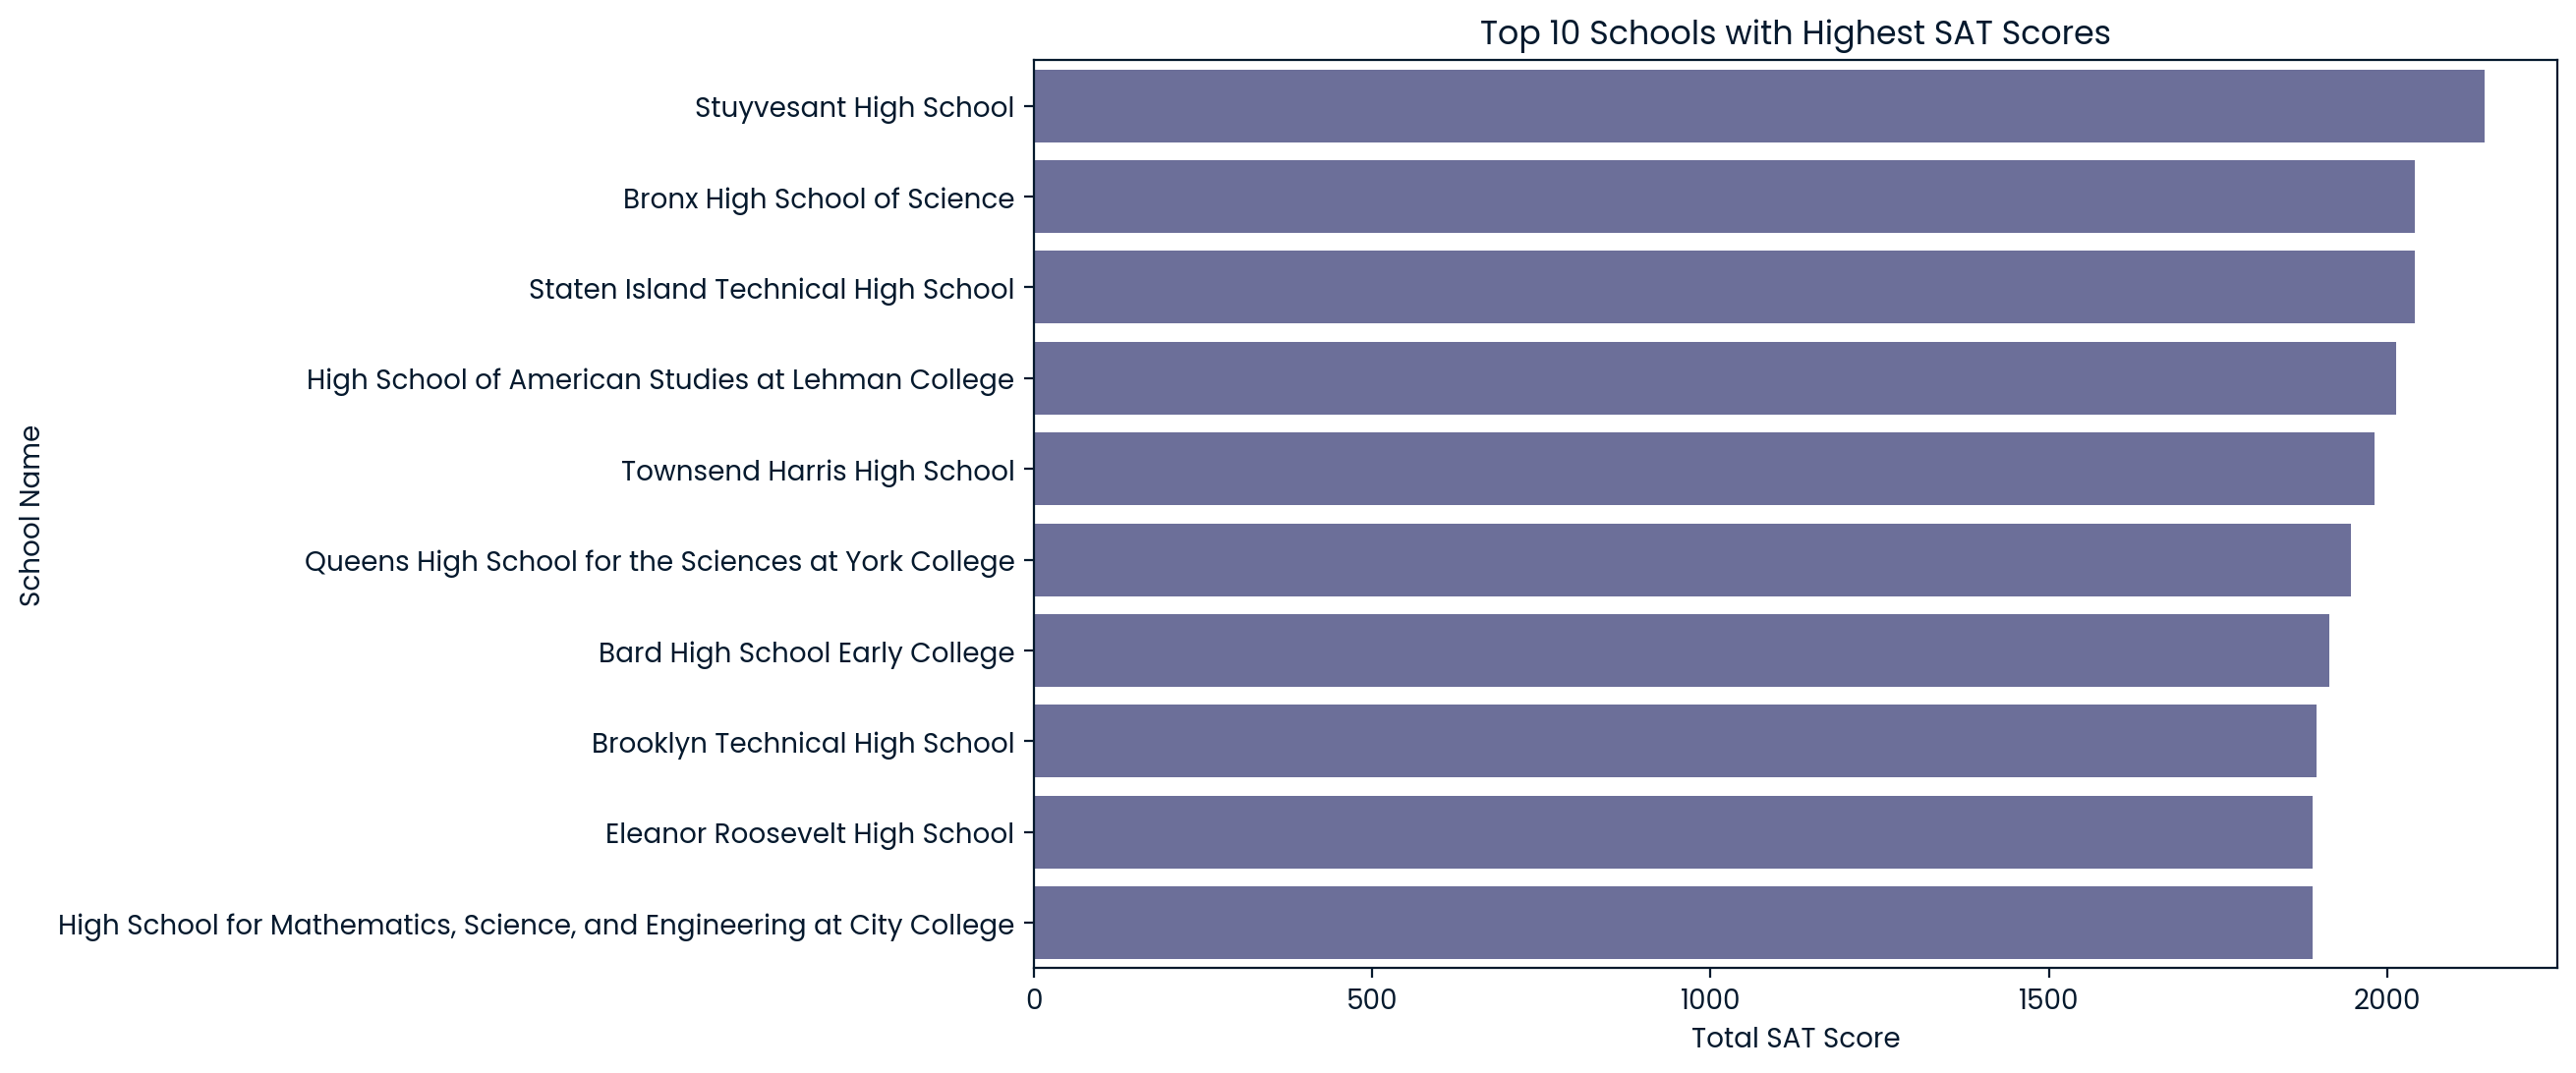

In [20]:
#combined SAT score
schools['total_SAT']= schools['average_math']+ schools['average_reading']+ schools['average_writing']
top_10_schools=schools[['school_name','total_SAT']].sort_values(by='total_SAT', ascending=False)[0:10]
top_10_schools

# Plot scores of top 10
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_schools, y='school_name', x='total_SAT')
plt.title('Top 10 Schools with Highest SAT Scores')
plt.xlabel('Total SAT Score')
plt.ylabel('School Name')
plt.show()


standard deviation by borough

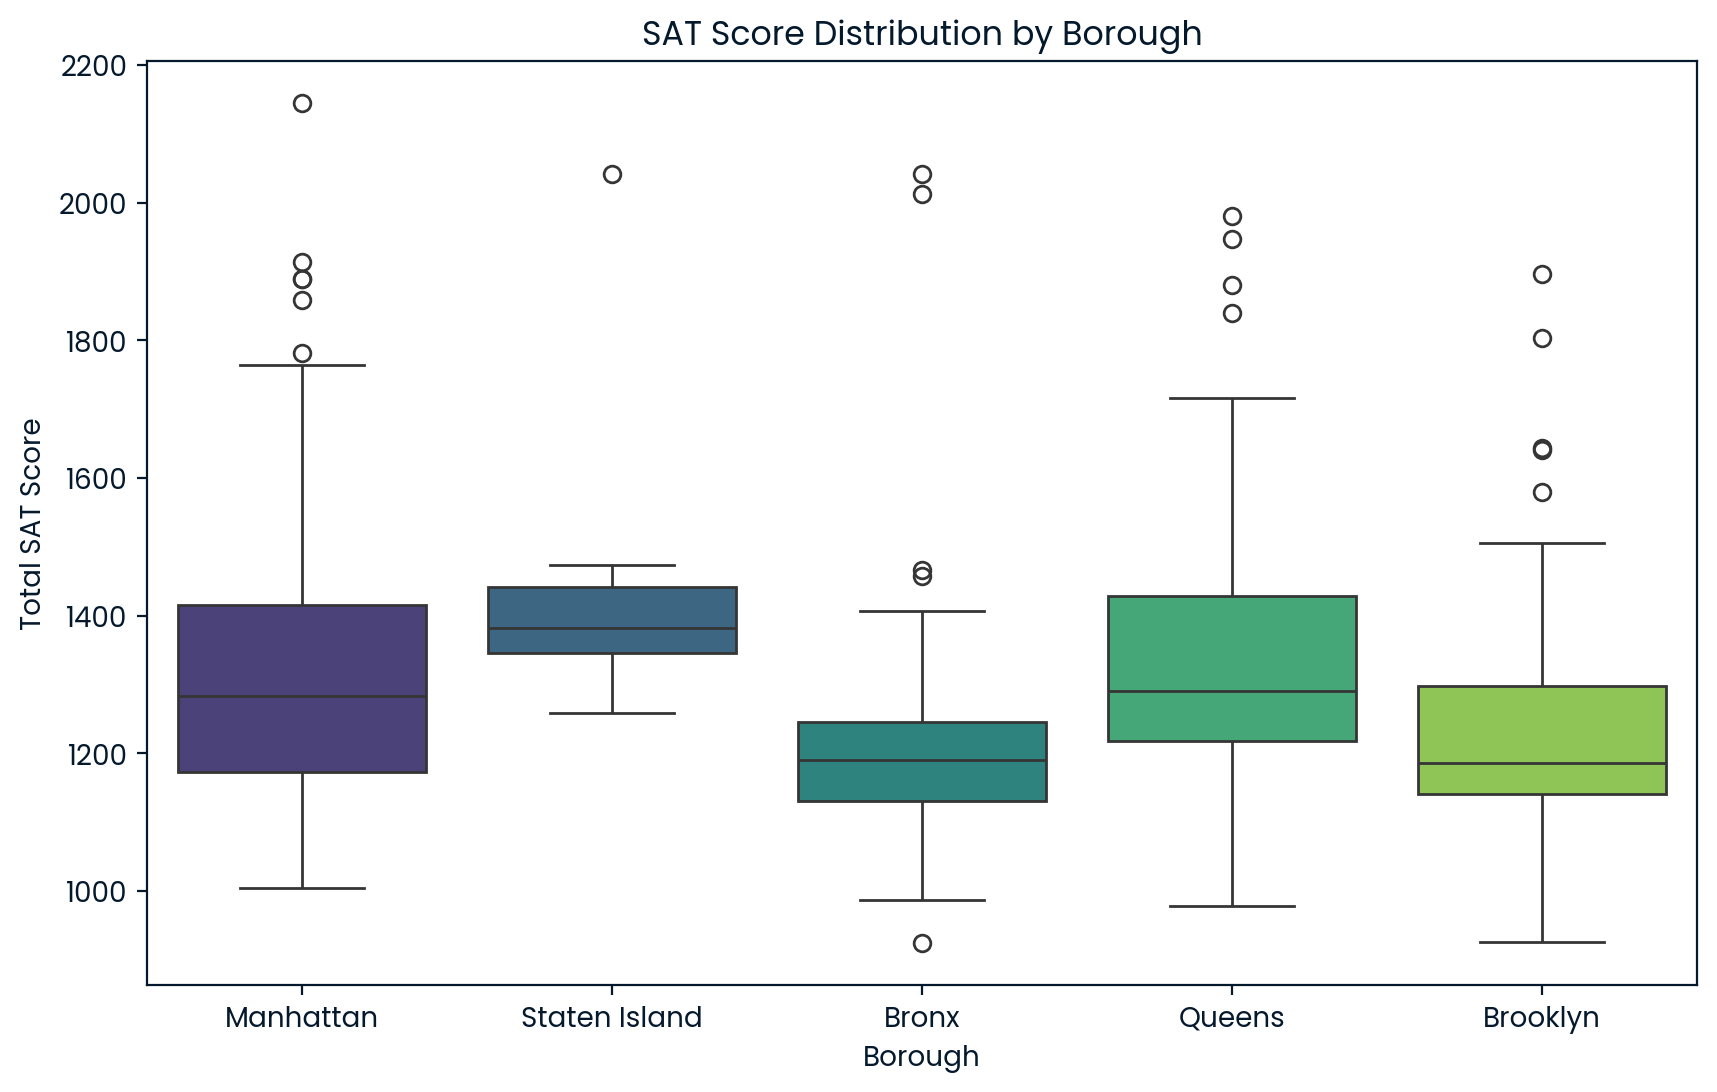

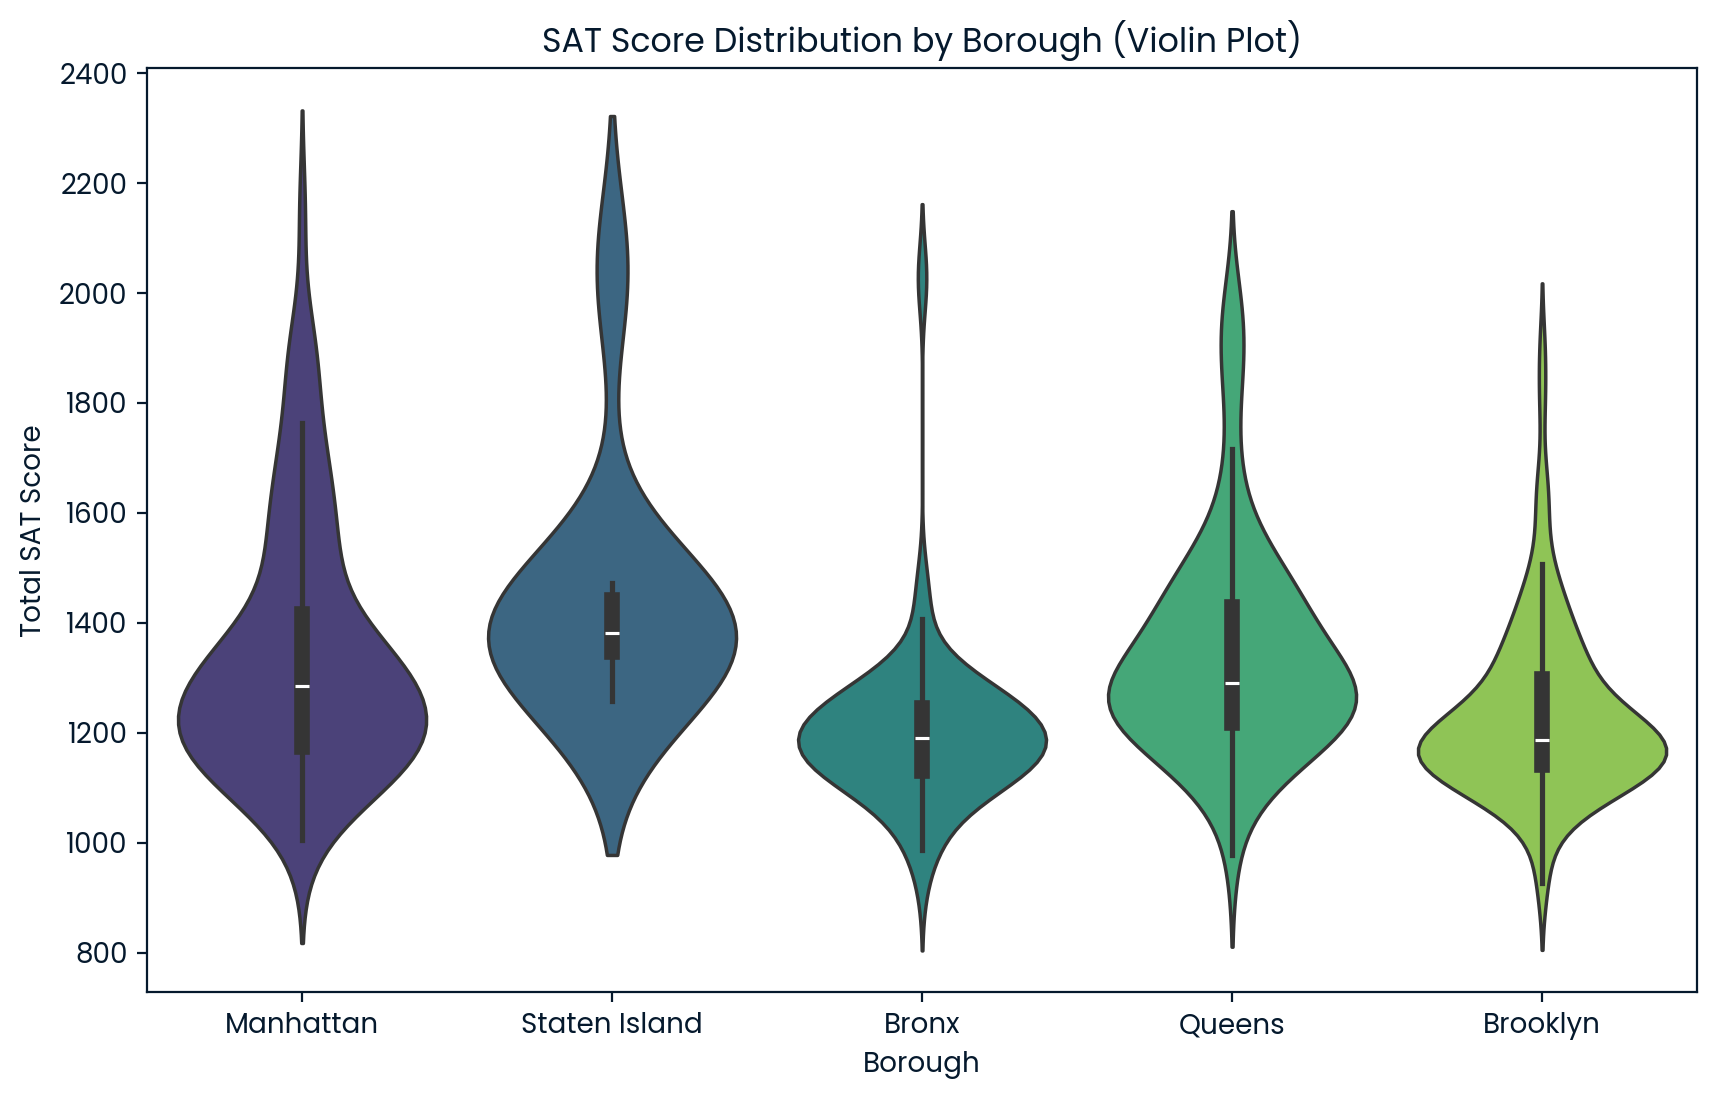

In [21]:
# Calculate statistics: count, mean, and std deviation of SAT scores by borough
borough_stats = schools.groupby('borough')['total_SAT'].agg(['count', 'mean', 'std']).sort_values(by='std', ascending=False).head(1)
borough_stats.columns = ["num_schools", "average_SAT", "std_SAT"]
borough_stats = borough_stats.round(2)

# Plot the distribution of total SAT scores by borough (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='borough', y='total_SAT', data=schools, palette='viridis')
plt.title('SAT Score Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Total SAT Score')
plt.show()

# Plot the distribution of total SAT scores by borough (Violin plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='borough', y='total_SAT', data=schools, palette='viridis')
plt.title('SAT Score Distribution by Borough (Violin Plot)')
plt.xlabel('Borough')
plt.ylabel('Total SAT Score')
plt.show()

In [9]:
largest_std_dev

borough  num_schools  average_SAT  std_SAT
0  Manhattan           89      1340.13   230.29